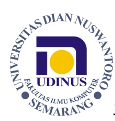

**Nama : Ahmad Taufik**

**NIM  :A11.2019.12142**

**Kelas:A12.6501**

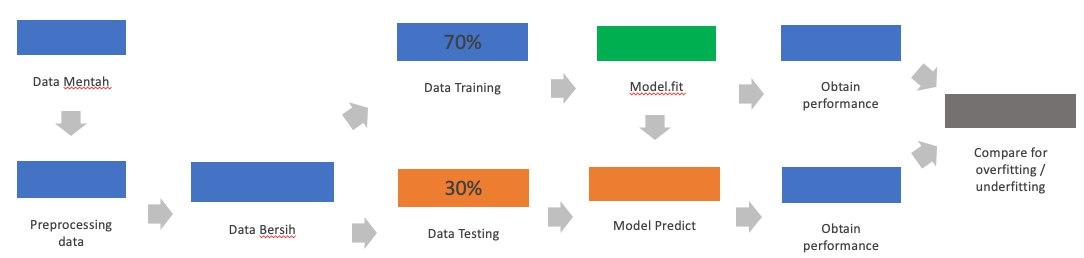

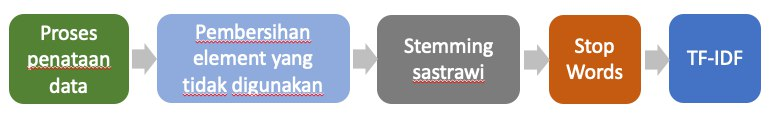

In [ ]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 


**Load Library**

Memanggil library yang akan digunakan

In [ ]:
import pandas as pd
import time
import tweepy
import numpy as np
import ekphrasis

**Load dataset mentah - lihat skema klasifikasi**

In [ ]:
df = pd.read_csv('dataset.csv')


**reprocessing Tahap 00**
Hapus label Sentimen karena yang akan dipakai adalah Emosi

In [ ]:
df = df.drop(['Sentimen'], axis=1)


**cek info**

In [ ]:
df.head()


,Tweet,Sentimen,Emosi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet     904 non-null    object 
 1   Sentimen  903 non-null    float64
 2   Emosi     904 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.3+ KB


***Preprocessing Tahap 01***
**Proses Penataan Data**
bisa menggunakan ekphrasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


**Pembersihan element yang tidak digunakan**
Deklarasikan sesuai kebutuhan

In [ ]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

In [ ]:
bersih_data('text')
non_ascii('text')

'text'

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [ ]:
i = 0
final_string = []
s = ""
for text in df['Tweet'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = bersih_data(text)
    #     dst
    #     dst
    #     dst
    EachReviewText = proc
    final_string.append(EachReviewText)

In [ ]:
df["step01"] = final_string


**Sampai tahap ini didaparkan kolom baru untuk Kolom step01**


In [ ]:
df.head(10)


,Tweet,Sentimen,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1,"cegah mata rantai covid - <number> , mari kita..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1,aku mohon yaallah semoga wabah covid - <number...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2,"nyuruh orang pintar , lu aja togog . itu kerum..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,0.0,1,pikir2 balik byk mnde plk nk setelkn lepas cov...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,-1,"selamat pagi , hari jum ' at . jum ' at keempa..."
7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,-2,"hikmah di balik musibah covid - <number> , smg..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,1,cegah covid - <number> beserta jajaran polsek ...
9,Ya Allah kami memohon pada mu perkenankanlah d...,1.0,-1,ya allah kami memohon pada mu perkenankanlah d...


**Hapus data kosong**

In [ ]:
df_hapus = df[~df['step01'].str.contains(" ")]


In [ ]:
df_hapus.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet     1 non-null      object 
 1   Sentimen  1 non-null      float64
 2   Emosi     1 non-null      int64  
 3   step01    1 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 40.0+ bytes


In [ ]:
df_hapus.head(10)


,Tweet,Sentimen,Emosi,step01
78,covid,0.0,1,covid


In [ ]:
df_new = df[~df.isin(df_hapus)].dropna()


In [ ]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   903 non-null    object 
 1   Emosi   903 non-null    float64
 2   step01  903 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


In [ ]:
df_new


,Tweet,Sentimen,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1.0,"cegah mata rantai covid - <number> , mari kita..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1.0,aku mohon yaallah semoga wabah covid - <number...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1.0,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2.0,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2.0,"nyuruh orang pintar , lu aja togog . itu kerum..."
...,...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,1.0,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",1.0,2.0,"setelah covid dan skripsi disaster selesai , m..."
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",0.0,1.0,"malam ini ! ! projek "" benda boleh bincang "" <..."
902,Pontang - panting di koyak covid 19,-1.0,-2.0,pontang - panting di koyak covid <number>


**Pembersihan data dengan konsep rubah kata SLANG menjadi kata BAKU**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def word_tokenize_wrapper(text):
  nltk.download('punkt')
  return word_tokenize(text)

In [ ]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_

**Sampai tahap ini didaparkan kolom baru untuk Kolom tokens**


In [ ]:
df_new.head(10)


,Tweet,Sentimen,Emosi,step01,tokens
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,..."
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,0.0,1.0,pikir2 balik byk mnde plk nk setelkn lepas cov...,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l..."
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,-1.0,"selamat pagi , hari jum ' at . jum ' at keempa...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '..."
7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,-2.0,"hikmah di balik musibah covid - <number> , smg...","[hikmah, di, balik, musibah, covid, -, <, numb..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,1.0,cegah covid - <number> beserta jajaran polsek ...,"[cegah, covid, -, <, number, >, beserta, jajar..."
9,Ya Allah kami memohon pada mu perkenankanlah d...,1.0,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [ ]:
normalized_word = pd.read_csv('kamus perbaikan kata.xlsx',encoding = 'unicode_escape',sep='delimiter') 

In [ ]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

In [ ]:
normalized_word_dict = {}

In [ ]:
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 


In [ ]:
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [ ]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)


In [ ]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [ ]:
df_new.head(10)


,Tweet,Sentimen,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,0.0,1.0,pikir2 balik byk mnde plk nk setelkn lepas cov...,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...",pikir2 balik banyak mnde plk nk setelkn lepas ...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,-1.0,"selamat pagi , hari jum ' at . jum ' at keempa...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '...","selamat pagi , hari jum ' at . jum ' at keempa..."
7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,-2.0,"hikmah di balik musibah covid - <number> , smg...","[hikmah, di, balik, musibah, covid, -, <, numb...","[hikmah, di, balik, musibah, covid, -, <, numb...","hikmah di balik musibah covid - < number > , s..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,1.0,cegah covid - <number> beserta jajaran polsek ...,"[cegah, covid, -, <, number, >, beserta, jajar...","[cegah, covid, -, <, number, >, beserta, jajar...",cegah covid - < number > beserta jajaran polse...
9,Ya Allah kami memohon pada mu perkenankanlah d...,1.0,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...


In [ ]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")


**Stemming menggunakan Sastrawi**
load sastrawi

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 15.1 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

**stopwords**


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
### Tuliskan perintahnya disini ???

stopwords_sastrawi = factory.create_stop_word_remover()

In [ ]:
df_new['step02'] = df_new['step02'].apply(str)


In [ ]:
df_new.head()


,Tweet,Sentimen,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke..."


In [73]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [74]:
df_new.loc[:, ('ProcessedText')] = final_string


In [75]:
df_new.head()


,Tweet,Sentimen,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki...",cegah mata rantai covid - number kita rumah hi...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...,aku mohon yaallah moga wabah covid - number hi...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,Covid belum nyampe prigen mbak hmm hoax,0.0,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke...",nyuruh orang pintar kamu togog kerumun orang n...


In [76]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")


*Mulai Modelling**

bagi menjadi feature dan label

In [77]:
dataset_feature = df_new['ProcessedText']


**Cek Distribusi Data**

In [78]:
dataset_label = df_new['Emosi']


In [79]:
dataset_label.value_counts()


 1.0    299
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [80]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


 1.0    33.1%
-1.0    27.2%
-2.0    22.3%
 2.0    17.4%
Name: Emosi, dtype: object

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 864x576 with 0 Axes>

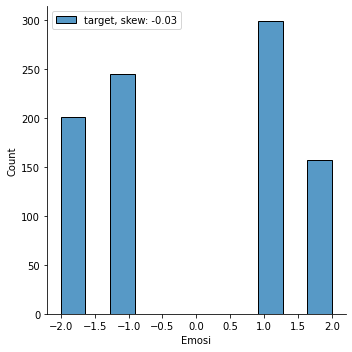

In [85]:
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

Dari data yang terlihat diatas dapat kita lihat pada proses distribusi dataset yang digunakan menghasilakan 300 dan 150 orang pada parameter 1(positif), untuk parameter 2 (negatif) menghasilkan dataset 250 dan 200 orang.

**Fitur Ekstraksi Menggunakan TF-IDF**

Cek Emosi

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [87]:
vectorizer = TfidfVectorizer()


In [88]:
X = vectorizer.fit_transform(dataset_feature)


In [89]:
print(X.shape)


(902, 3746)


In [90]:
features = vectorizer.get_feature_names_out()
features

array(['19', 'aa', 'aamiingimana', ..., 'zmn', 'zona', 'zone'],
      dtype=object)

In [91]:
idfValues = vectorizer.idf_


In [92]:
d = dict(zip(features, 9 - idfValues))


In [93]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)


In [94]:
for i in range(200):
    print(sortedDict[i])

('covid', 7.96735782223855)
('number', 7.751055802741057)
('virus', 5.758625638050851)
('orang', 5.613118054379612)
('sama', 5.538082868436698)
('sebar', 5.538082868436698)
('iya', 5.511765560119326)
('corona', 5.498342539787185)
('jadi', 5.47094356559907)
('rumah', 5.47094356559907)
('cegah', 5.45695732362433)
('moga', 5.413785151759122)
('semua', 5.39897006597398)
('wabah', 5.321411831628106)
('kalau', 5.305151310756326)
('ada', 5.288622008805115)
('indonesia', 5.201610631815486)
('pandemi', 5.183261493147289)
('perintah', 5.164569360135136)
('buat', 5.145521165164442)
('tangan', 5.12610307930734)
('hari', 5.10630045201116)
('lebih', 5.065478457490905)
('banyak', 5.044425048293073)
('positif', 5.02291884307211)
('jangan', 5.000939936353334)
('tak', 5.000939936353334)
('warga', 5.000939936353334)
('pasien', 4.978467080501275)
('bantu', 4.955477562276577)
('mau', 4.955477562276577)
('sehat', 4.955477562276577)
('masyarakat', 4.9319470648663835)
('yang', 4.9319470648663835)
('satu', 4.9

In [96]:
positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

**cek emosi positive low**


In [97]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [99]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

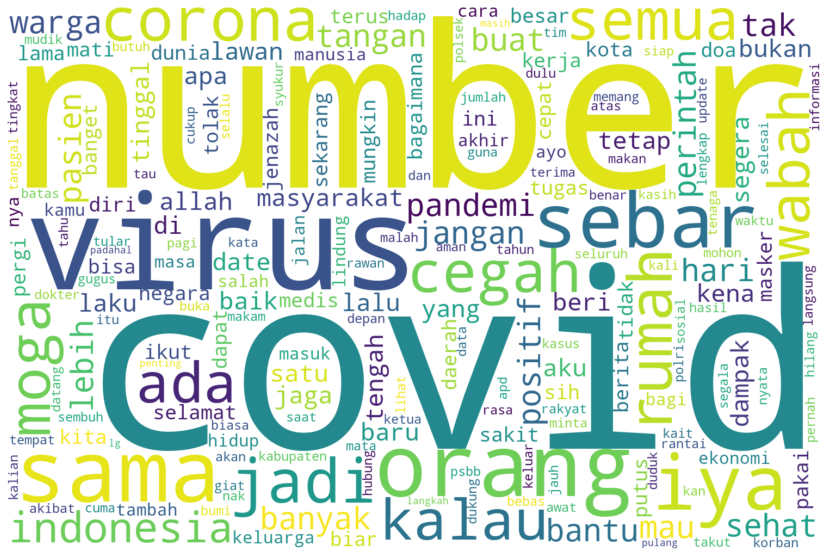

In [100]:
PlotWordCloud(d)


In [101]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))


In [102]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)


In [103]:
Data_TFIDF.shape


(902, 14236)

**Training dan Testing dibagi menjadi 70 - 30**
dengan 70 untuk data training dan 30 untuk data testing



In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [105]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [106]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape


((631,), (271,), (631,), (271,))

**Model - Naive Bayes**

In [108]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [109]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [110]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)


In [111]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

**nilai accuracy Training set dan Test set**

In [114]:
## Berapa nilai Accuracy Training set dan Test Set
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9603803486529319
Accuracy Test set:  0.5239852398523985


**nilai Recall Training set dan Test set**

In [113]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9603803486529319
Recall Test set:  0.5239852398523985


**nilai Precision Training set dan Test set**

In [115]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9615348434695805
Precision Test set:  0.5183138530892698


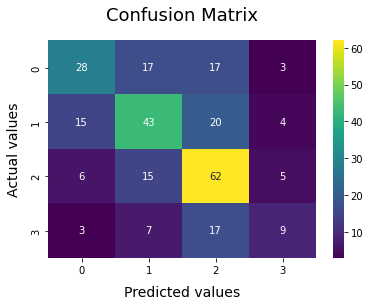

In [116]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

**Visualisasi**


In [117]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [118]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.96038,0.523985


In [119]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [120]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.523985,0.523985,0.518314


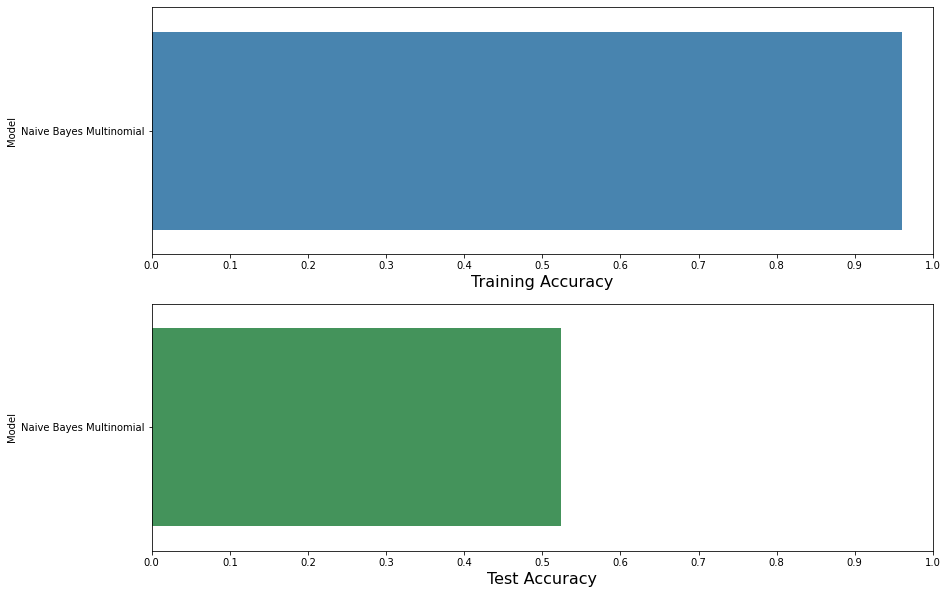

In [121]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()